# DESAFIO 2 - BOOTCAMP MACHINE LEARNING

Neste desafio serão abordados todos os conceitos apresentados durante a disciplina Modelos Preditivos e Séries Temporais (MPT). Para este desafio será utilizada uma versão modificada do dataset “Wine Quality” disponível no UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/wine). Esse dataset contém um conjunto de atributos (dados de sensores) sobre o processo de fabricação de vinhos (tinto e branco). Esses dados são utilizados para classificar, ao final do processo, a qualidade do vinho obtido. Existem informações como o teor alcoólico e nível de acidez.

OBJETIVO:
Exercitar os seguintes conceitos trabalhados no Módulo:
- Análise exploratória dos dados (EDA - Exploratory Data Analysis).
- Preparação dos dados.
- Comparação e ajuste de modelos de classificação.

In [1]:
#Importando dataset
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [3]:
#Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
#Carregando nosso dataset em um dataframe
df = pd.read_csv("winequality-red.csv",sep = ';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Análise Exploratório de Dados

In [10]:
#Verificando a forma do nosso dataset
print("Entradas: {}".format(df.shape[0]))
print("Variáveis: {}".format(df.shape[1]))

Entradas: 1599
Variáveis: 12


In [18]:
#Analisando o tipo dos dados
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Como podemos ver, possuímos apenas variáveis numéricas. Abaixo podemos ver que há apenas dois tipo de variáveis diferentes

In [19]:
len(df.dtypes.value_counts())

2

In [21]:
#Verificando informações sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [22]:
#Verificando a soma dos valores nulos por variável
df.isnull().sum().sort_values(ascending = False)

quality                 0
alcohol                 0
sulphates               0
pH                      0
density                 0
total sulfur dioxide    0
free sulfur dioxide     0
chlorides               0
residual sugar          0
citric acid             0
volatile acidity        0
fixed acidity           0
dtype: int64

Não há valores missing em nosso dataset

In [23]:
#Analisando a descrição estatística do nosso dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [31]:
#Desvio padrão da variável "residual sugar"
print("O Desvio padrão da variável Residual Segar é {:.4f}".format(df['residual sugar'].std()))
#Media da variável "residual sugar"
print("A mediana da variável residual sugar é {}".format(df['residual sugar'].median()))

O Desvio padrão da variável Residual Segar é 1.4099
A mediana da variável residual sugar é 2.2


In [35]:
#Sobre o coeficiente de correlação de Pearson entre as variáveis "fixed acidity" e "pH"
df[['fixed acidity','pH']].corr()

,fixed acidity,pH
fixed acidity,1.000000,-0.682978
pH,-0.682978,1.000000


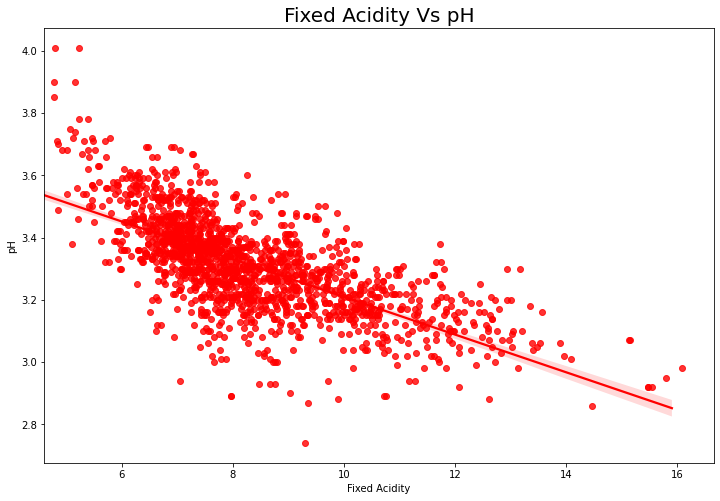

In [88]:
plt.figure(figsize=(12,8))
sns.regplot(x = 'fixed acidity', y ='pH', data = df, color = 'r', x_jitter=0.2)
plt.xlabel("Fixed Acidity")
plt.ylabel("pH")
plt.title("Fixed Acidity Vs pH", fontsize = 20)
plt.show()


In [37]:
#coeficiente de correlação de Pearson entre as variáveis "quality" e "alcohol"
df[['quality','alcohol']].corr()

,quality,alcohol
quality,1.000000,0.476166
alcohol,0.476166,1.000000


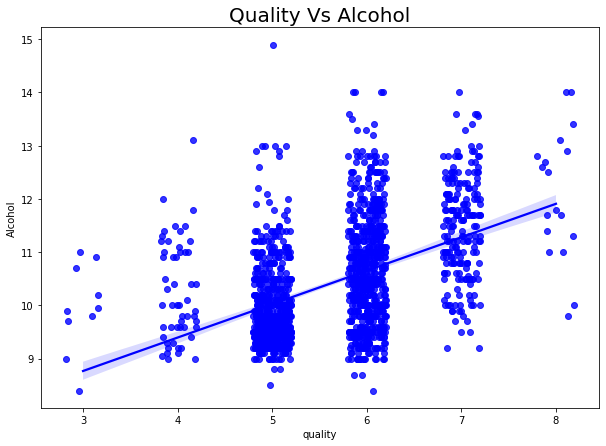

In [89]:
plt.figure(figsize = (10,7))
sns.regplot(x = 'quality', y = 'alcohol', data = df, x_jitter=0.2, color = 'b')
plt.xlabel("quality")
plt.ylabel("Alcohol")
plt.title("Quality Vs Alcohol", fontsize = 20)
plt.show()

In [38]:
#Verificando as instâncias da nossa variável target
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [40]:
#Quantidade de instâncias cuja qualidade do vinha é igual a 5
len(df[df['quality'] == 5])

681

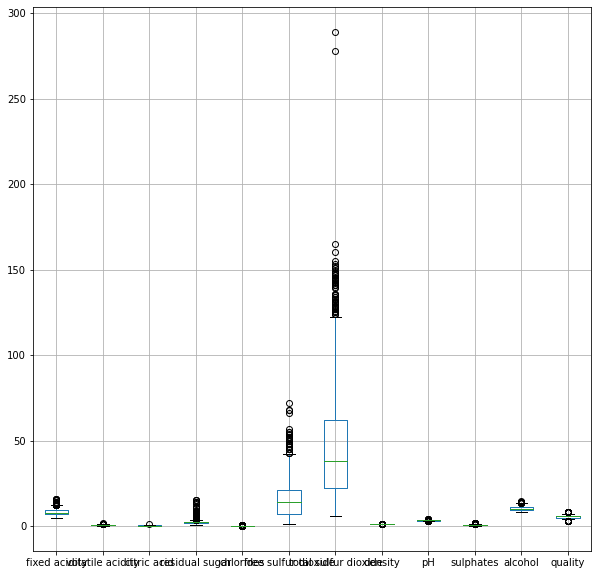

In [44]:
#Plotando um gráfico de boxplot das nossas variáveis
df.boxplot(figsize = (10,10))

### Preparação dos Dados

In [60]:
#separando nosso dadaset em variáveis preditores e variável target
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [72]:
#Normalizando nossos dados de entrada com os parâmetros default
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
array_scaler = scaler.fit_transform(X)
col = X.columns

In [74]:
#Verificando como ficou nossos dados de entrada após aplicar a normalização em um dataframe
df_norm = pd.DataFrame(array_scaler, columns = col)
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


In [75]:
#Encontrando o valor mínimo para a variável "fixed acidity"
df_norm['fixed acidity'].min()

0.0

In [78]:
#Dividindo nossos dados em treino e teste
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_norm,y,test_size = 0.3, random_state = 1)

# Construção do Modelo 

- KNN
- Decision Tree
- RandomForest
- SVM
- MLP 

#### KNN

In [83]:
#Aplicando o algoritmo de KNearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5) #Utilizaremos 5 vizinhos mais próximos
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [84]:
#Verificando a acurácia do modelo
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y_test,y_pred)
print("Acurácia KNN: {}".format(acuracia))

Acurácia KNN: 0.5645833333333333


#### DecisionTree

In [85]:
#Aplicando o algoritmo de Árvores de Decisão
from sklearn.tree import DecisionTreeClassifier
clf_arvore = DecisionTreeClassifier()
clf_arvore.fit(X_train,y_train)
y_arvore_pred = clf_arvore.predict(X_test)

In [91]:
#Verificando a acurácia do algoritmo de árvores de decisão
acuracia_tree = accuracy_score(y_test,y_arvore_pred)
print("Acurácia DecisionTree: {}".format(acuracia_tree))

Acurácia DecisionTree: 0.5916666666666667


#### RandomForest

In [94]:
#Aplicando o algoritmo RandomForest
from sklearn.ensemble import RandomForestClassifier
clf_floresta = RandomForestClassifier(max_depth = 10, random_state = 1)
clf_floresta.fit(X_train,y_train)
y_pred_floresta = clf_floresta.predict(X_test)
acuracia_floresta = accuracy_score(y_test,y_pred_floresta)

In [95]:
#Verificano a acurácia
print("Acurácia RandomFlorest: {}".format(acuracia_floresta))

Acurácia RandomFlorest: 0.6791666666666667


#### SVM

In [96]:
#Aplicando algoritmo SVM 
from sklearn.svm import SVC
clf_svm = SVC(gamma = 'auto', kernel = 'rbf')
clf_svm.fit(X_train,y_train)
y_pred_svm = clf_svm.predict(X_test)
acuracia_svm = accuracy_score(y_test,y_pred_svm)

In [97]:
#Verificando acurácia SVM
print("Acurácia SVM: {}".format(acuracia_svm))

Acurácia SVM: 0.5854166666666667


#### MLP

In [99]:
#Aplicando o MLP
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier(alpha = 1e-5,hidden_layer_sizes = (5,5), random_state = 1)
clf_mlp.fit(X_train,y_train)
y_pred_mlp = clf_mlp.predict(X_test)
acuracia_mlp = accuracy_score(y_test,y_pred_mlp)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [100]:
#Verificando a acurácia do MLP
print("Acurácia MLP: {}".format(acuracia_mlp))

Acurácia MLP: 0.6


Modifique o dataset para um sistema binário que considere vinhos com nota maior do que 5 (6, 7, 8) sejam bons e menores ou igual a 5 ruins (5, 4, 3). Aplique o modelo da floresta randômica. Qual a acurácia do modelo para esse novo dataset?
Grupo de escolhas da pergunta


In [140]:
#Modificando os dataset 
df_modify = df.copy()

In [150]:
#Separando os dados
X_new = df_modify.iloc[:,:11]
y_new = df_modify.quality

In [151]:
#Dicionário de Variáveis
Y_new = y_new.replace({6:1,7:1,8:1,5:0,4:0,3:0})

In [152]:
#Aplicando a normalização
scaler_new = MinMaxScaler()
new_array = scaler_new.fit_transform(X_new)
df_new_array = pd.DataFrame(new_array, columns = X_new.columns)
df_new_array.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


In [153]:
#Separando nossos dados em treino e teste
X_train,X_test,y_train,y_test = train_test_split(new_array,Y_new,test_size = 0.3, random_state = 1)

In [154]:
#Aplicando nosso algoritmo RandomForest
clf_forest_new = RandomForestClassifier(max_depth=10, random_state = 1)
clf_forest_new.fit(X_train,y_train)
y_pred_new_forest = clf_forest_new.predict(X_test)
acuracia_forest_new = accuracy_score(y_test,y_pred_new_forest)

In [155]:
#Verificando Nossa acurácia
print("Acurácia RandomForest Modificada: {}".format(acuracia_forest_new))

Acurácia RandomForest Modificada: 0.8041666666666667
